In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


### Lectura de datos

In [18]:
ruta_df = './data/df_set.csv'
ruta_df_train = './data/train_set.csv'
df = pd.read_csv(ruta_df, sep = ',')
df_train = pd.read_csv(ruta_df_train, sep = ',')

C:\Users\Michael_PC\AppData\Local\Temp\ipykernel_5412\989324326.py:4: DtypeWarning:

Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
df.head()

,trip_id,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,...,start_year,start_hour,start_minute,start_second,end_day,end_month,end_year,end_hour,end_minute,end_second
0,101750280,35,2018-08-07 11:20:00,2018-08-07 11:55:00,33.748920,-118.275192,33.748920,-118.275192,6530,1.0,...,2018,11,20,0,7,8,2018,11,55,0
1,46560345,32,2017-09-17 17:51:00,2017-09-17 18:23:00,34.035679,-118.270813,34.047749,-118.243172,6683,0.0,...,2017,17,51,0,17,9,2017,18,23,0
2,120016336,6,2019-04-22 09:22:00,2019-04-22 09:28:00,34.046070,-118.233093,34.047749,-118.243172,6710,30.0,...,2019,9,22,0,22,4,2019,9,28,0
3,129547190,138,2019-09-22 11:27:00,2019-09-22 13:45:00,34.062580,-118.290092,34.059689,-118.294662,17068,1.0,...,2019,11,27,0,22,9,2019,13,45,0
4,136619463,14,2020-01-31 17:11:00,2020-01-31 17:25:00,34.026291,-118.277687,34.021660,-118.278687,18841,30.0,...,2020,17,11,0,31,1,2020,17,25,0


### convertir las variables start_time y end_time a datetime

In [4]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

### Pregunta
* Saturación del servicio: La empresa busca contar con la disponibilidad más alta
de servicio en el mercado, por lo que se quiere entender cómo se comporta la
demanda de servicio en las distintas estaciones y horarios para cada plan.

In [5]:
grupo_anio = df.groupby(['passholder_type', 
                  'start_station',
                  'end_station',
                  'start_year',
                  'end_year']
                  ).size()
grupo_anio_ordenado = grupo_anio.sort_values(ascending = False).to_frame().reset_index()
grupo_anio_ordenado.rename(columns = {0:'cantidad_de_viajes'}, inplace = True)
grupo_anio_ordenado.head()

,passholder_type,start_station,end_station,start_year,end_year,cantidad_de_viajes
0,Monthly Pass,3030,3014,2019,2019,5059
1,Monthly Pass,3014,3030,2019,2019,4340
2,Walk-up,4214,4214,2018,2018,3804
3,Monthly Pass,4214,4214,2018,2018,3493
4,Monthly Pass,3030,3014,2018,2018,2755


### Frecuencia de estaciones iniciales con respecto al plan

In [6]:
cant_viajes_passholder_start_station = grupo_anio_ordenado.groupby(
    ['passholder_type', 'start_station']
    )['cantidad_de_viajes'
      ].sum().to_frame().reset_index().sort_values(
          by = 'cantidad_de_viajes', ascending = False)
cant_viajes_passholder_start_station

,passholder_type,start_station,cantidad_de_viajes
436,Monthly Pass,3005,43885
457,Monthly Pass,3030,32712
444,Monthly Pass,3014,28374
458,Monthly Pass,3031,26276
462,Monthly Pass,3035,23209
...,...,...,...
1177,Testing,4419,1
1178,Testing,4425,1
1180,Testing,4460,1
1182,Testing,4470,1


### Guardando el archivo: cant_viajes_passholder_start_station

In [7]:
ruta_cant_viajes_passholder_start_station = './data/cant_viajes_passholder_start_station.csv'

cant_viajes_passholder_start_station.to_csv(
    ruta_cant_viajes_passholder_start_station,
    sep = ','
    )

### Frecuencia de estaciones finales con respecto al plan

In [8]:
cant_viajes_passholder_end_station = grupo_anio_ordenado.groupby(
    ['passholder_type', 'end_station']
    )['cantidad_de_viajes'
      ].sum().to_frame().reset_index().sort_values(
          by = 'cantidad_de_viajes', ascending = False)
cant_viajes_passholder_end_station

,passholder_type,end_station,cantidad_de_viajes
433,Monthly Pass,3005,47120
441,Monthly Pass,3014,31203
454,Monthly Pass,3030,28212
455,Monthly Pass,3031,28095
459,Monthly Pass,3035,23859
...,...,...,...
166,Annual Pass,4407,1
256,Annual Pass,4539,1
427,Flex Pass,4276,1
426,Flex Pass,4249,1


### Guardando el archivo cant_viajes_passholder_end_station

In [9]:
ruta_cant_viajes_passholder_end_station = './data/cant_viajes_passholder_end_station'
ruta_cant_viajes_passholder_end_station += '.csv'

cant_viajes_passholder_end_station.to_csv(
    ruta_cant_viajes_passholder_end_station,
    sep = ','
)

### Observando los Viajes por año

In [10]:
viajes_por_anio = df.groupby('start_year').size().to_frame().reset_index()
viajes_por_anio = viajes_por_anio.rename(columns = {0:'cantidad_de_viajes'})
viajes_por_anio = viajes_por_anio.sort_values(by = 'cantidad_de_viajes',
                                              ascending=True)
viajes_por_anio

,start_year,cantidad_de_viajes
0,2016,43198
5,2021,185223
4,2020,209974
1,2017,229255
3,2019,290342
2,2018,311894


### Cantidad de planes por año

In [11]:
grupo__planes_anio = df.groupby([
                  'start_year',
                  'passholder_type', 
                  ]
                  ).size()
grupo_planes_anio_ordenado = grupo__planes_anio.to_frame().reset_index()
grupo_planes_anio_ordenado.rename(columns = {0:'cantidad_de_planes'}, inplace = True)
grupo_planes_anio_ordenado = grupo_planes_anio_ordenado.sort_values(
    by = ['start_year', 'cantidad_de_planes'], ascending = True)
grupo_planes_anio_ordenado

,start_year,passholder_type,cantidad_de_planes
0,2016,Flex Pass,1534
2,2016,Walk-up,7134
1,2016,Monthly Pass,34530
5,2017,One Day Pass,3247
3,2017,Flex Pass,6195
6,2017,Walk-up,37318
4,2017,Monthly Pass,182495
7,2018,Annual Pass,1188
8,2018,Flex Pass,3713
10,2018,One Day Pass,9600


In [12]:
grupo_planes_anio_ordenado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 0 to 24
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   start_year          28 non-null     int64 
 1   passholder_type     28 non-null     object
 2   cantidad_de_planes  28 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 896.0+ bytes


#### Guardando el dataset grupo_planes_anio_ordenado

In [13]:
ruta_grupo_planes_anio_ordenado = './data/grupo_planes_anio_ordenado.csv'
grupo_planes_anio_ordenado.to_csv(
    ruta_grupo_planes_anio_ordenado,
    sep = ',')

In [14]:
# Create the time series plot
fig = px.line(
    grupo_planes_anio_ordenado,
    x='start_year',
    y='cantidad_de_planes',
    color='passholder_type',  # Line for each passholder_type
    markers=True,  # Add markers to the lines
    labels={
        'start_year': 'Year',
        'cantidad_de_planes': 'Number of Plans',
        'passholder_type': 'Passholder Type'
    },
    title='Number of Plans Over Time by Passholder Type'
)

# Customize layout (optional)
fig.update_layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Number of Plans'),
    legend_title='Passholder Type'
)


In [15]:
total_planes_por_anio = grupo_planes_anio_ordenado.groupby(
    'start_year')['cantidad_de_planes'].sum().to_frame().reset_index()
total_planes_por_anio = total_planes_por_anio.sort_values(
    by = 'cantidad_de_planes', ascending=True)
total_planes_por_anio

,start_year,cantidad_de_planes
0,2016,43198
5,2021,185223
4,2020,207398
1,2017,229255
3,2019,290342
2,2018,311894


### Crear un grafo con plotly

In [17]:
# # Initialize an empty graph
# G = nx.Graph()
# # Add edges between start and end stations
# for _, row in df.iterrows():
#     G.add_edge(row['start_station'], row['end_station'])

# # Draw the graph
# plt.figure(figsize=(8, 6))
# nx.draw(G, with_labels=True, node_size=2000, node_color='skyblue', font_size=12, font_weight='bold', edge_color='gray')
# plt.title("Connections Between Start and End Stations")
# plt.show()

### Observando la relación entre la variables Plan duration con respecto a la variable objetivo

In [19]:
df_train.head()

,trip_id,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_station,end_station
0,101750280,35,2018-08-07 11:20:00,2018-08-07 11:55:00,33.748920,-118.275192,33.748920,-118.275192,06530,1.0,Round Trip,Walk-up,4127,4127
1,46560345,32,9/17/2017 17:51,9/17/2017 18:23,34.035679,-118.270813,34.047749,-118.243172,6683,0.0,One Way,Walk-up,3057,3062
2,120016336,6,2019-04-22 09:22:00,2019-04-22 09:28:00,34.046070,-118.233093,34.047749,-118.243172,06710,30.0,One Way,Monthly Pass,3022,3062
3,129547190,138,9/22/2019 11:27,9/22/2019 13:45,34.062580,-118.290092,34.059689,-118.294662,17068,1.0,One Way,One Day Pass,4304,4311
4,136619463,14,1/31/2020 17:11,1/31/2020 17:25,34.026291,-118.277687,34.021660,-118.278687,18841,30.0,One Way,Monthly Pass,4266,4443


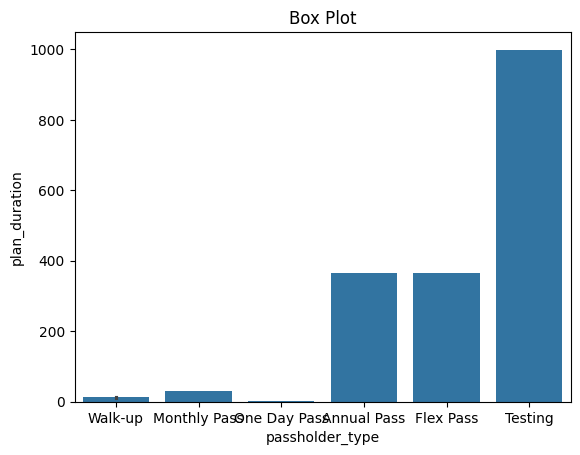

In [21]:
# Box plot
sns.barplot(x='passholder_type', y='plan_duration', data= df_train)
plt.title("Box Plot")
plt.show()